# Importamos las librerias

In [50]:
import numpy as np
import os
import pandas as pd
import sqlite3
from scipy import stats
import matplotlib.pyplot as plt
import tarfile
import zipfile
from scipy.io import loadmat
from urllib.request import urlretrieve
from os.path import isfile, isdir
import plotly.express as px
import seaborn as sns; sns.set()
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
import statsmodels.api as sm
%matplotlib inline

from scipy.io import loadmat
import glob
import random
import matplotlib.image as img
#Install pillow
from PIL import Image

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

## 1 PCA

### Importamos el data set

In [2]:
def download_files():
    """
    Este metodo descarga los archivos de imagenes sino existen
    """
    path_tar = os.path.join("data",'faces.zip')
    if not isfile(path_tar):
        urlretrieve(
            'http://courses.media.mit.edu/2002fall/mas622j/proj/faces/rawdata.zip',
            path_tar)
    dest_path =  "data/faces"
    with zipfile.ZipFile(path_tar) as tar:
        tar.extractall(dest_path)
        tar.close()
download_files()

In [3]:
d_name = 'data/faces/rawdata'
sample = 0.2
X = []
for nfile in  os.listdir(d_name):
    if random.random() <= sample:
        bytes_read = open(os.path.join(d_name,nfile), "rb").read()
        img = Image.frombytes('L', (128,128), bytes_read)
        X.append(np.array(img).flatten())

X = np.array(X)

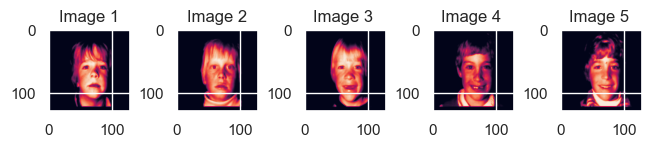

In [4]:
def plot_1_images(data, label="Image 1", ax=None):
    fn_shape = lambda X: X.reshape(128,128)
    fig = None
    if ax is None:
        fig, ax = plt.subplots(1,1, constrained_layout=True)
    ax.imshow(fn_shape(data))
    ax.set_title(label=label)
    return fig,ax

def plot_3_images(data,ix_1, ix_2 , ix_3):
    fn_shape = lambda X: X.reshape(128,128)
    fig, ax = plt.subplots(1,3, constrained_layout=True)
    ax[0].imshow(fn_shape(data[ix_1]))
    ax[0].set_title(label="Image %s"% ix_1)
    ax[1].imshow(fn_shape(data[ix_2]))
    ax[1].set_title(label="Image %s"% ix_2)
    ax[2].imshow(fn_shape(data[ix_2]))
    ax[2].set_title(label="Image %s "% ix_3)
    plt.show()

def plot_5_images(data,ix_1, ix_2 , ix_3,ix_4,ix_5):
    fn_shape = lambda X: X.reshape(128,128)
    fig, ax = plt.subplots(1,5, constrained_layout=True)
    ax[0].imshow(fn_shape(data[ix_1]))
    ax[0].set_title(label="Image %s"% ix_1)
    ax[1].imshow(fn_shape(data[ix_2]))
    ax[1].set_title(label="Image %s"% ix_2)
    ax[2].imshow(fn_shape(data[ix_3]))
    ax[2].set_title(label="Image %s "% ix_3)
    ax[3].imshow(fn_shape(data[ix_4]))
    ax[3].set_title(label="Image %s "% ix_4)
    ax[4].imshow(fn_shape(data[ix_5]))
    ax[4].set_title(label="Image %s "% ix_5)
    plt.show()

plot_5_images(X,1,2,3,4,5)

### 1. Calcular la mean face. Que es la cara con el promedio de los pixeles y visualizarla.

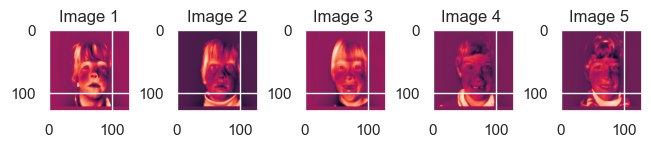

In [5]:
X_mean = X.mean(axis=0)
X_center = X - X_mean
plot_5_images(X_center,1, 2 ,3,4,5)

###  Centrar los datos, utilizar PCA

In [6]:
pca = PCA(n_components=200)
X_reduced = pca.fit_transform(X_center)


eigen_values = pca.explained_variance_
eigen_faces = pca.components_

## Reconstruccion de las imagenes:

- Imagen 1:

(None, <Axes: title={'center': 'Con 99 porciento eigenfaces'}>)

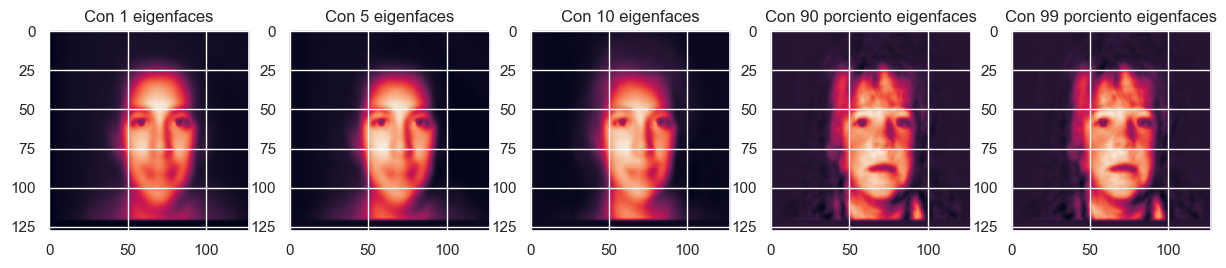

In [7]:
face_1 = X_mean + np.sum(np.dot(X_reduced[1].reshape(1,-1)[:,:1], eigen_faces[:1,:]), axis=0)
face_5 = X_mean + np.sum(np.dot(X_reduced[1].reshape(1,-1)[:,:5],  eigen_faces[:5,:]), axis=0)
face_10 = X_mean + np.sum(np.dot(X_reduced[1].reshape(1,-1)[:,:10],  eigen_faces[:10,:]), axis=0)
face_90 = X_mean + np.sum(np.dot(X_reduced[1].reshape(1,-1)[:,:180], eigen_faces[:180,:]),  axis=0)
face_99 = X_mean + np.sum(np.dot(X_reduced[1].reshape(1,-1)[:,:198], eigen_faces[:198,:]),  axis=0)

fig, ax = plt.subplots(1,5,figsize=(15,15))



plot_1_images(face_1,ax=ax[0],label="Con 1 eigenfaces")
plot_1_images(face_5,ax=ax[1],label="Con 5 eigenfaces")
plot_1_images(face_10,ax=ax[2],label="Con 10 eigenfaces")
plot_1_images(face_90,ax=ax[3],label="Con 90 porciento eigenfaces")
plot_1_images(face_90,ax=ax[4],label="Con 99 porciento eigenfaces")

- Imagen 2:

(None, <Axes: title={'center': 'Con 99 porciento eigenfaces'}>)

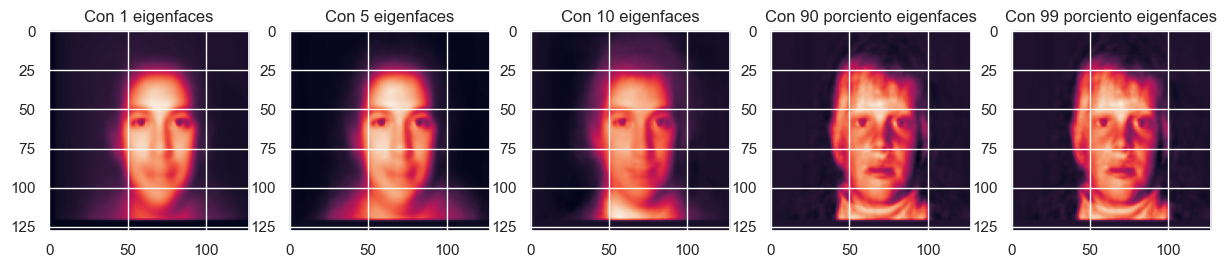

In [8]:
face_1 = X_mean + np.sum(np.dot(X_reduced[2].reshape(1,-1)[:,:1], eigen_faces[:1,:]), axis=0)
face_5 = X_mean + np.sum(np.dot(X_reduced[2].reshape(1,-1)[:,:5],  eigen_faces[:5,:]), axis=0)
face_10 = X_mean + np.sum(np.dot(X_reduced[2].reshape(1,-1)[:,:10],  eigen_faces[:10,:]), axis=0)
face_90 = X_mean + np.sum(np.dot(X_reduced[2].reshape(1,-1)[:,:180], eigen_faces[:180,:]),  axis=0)
face_99 = X_mean + np.sum(np.dot(X_reduced[2].reshape(1,-1)[:,:198], eigen_faces[:198,:]),  axis=0)

fig, ax = plt.subplots(1,5,figsize=(15,15))



plot_1_images(face_1,ax=ax[0],label="Con 1 eigenfaces")
plot_1_images(face_5,ax=ax[1],label="Con 5 eigenfaces")
plot_1_images(face_10,ax=ax[2],label="Con 10 eigenfaces")
plot_1_images(face_90,ax=ax[3],label="Con 90 porciento eigenfaces")
plot_1_images(face_90,ax=ax[4],label="Con 99 porciento eigenfaces")

- Imagen 3:

(None, <Axes: title={'center': 'Con 99 porciento eigenfaces'}>)

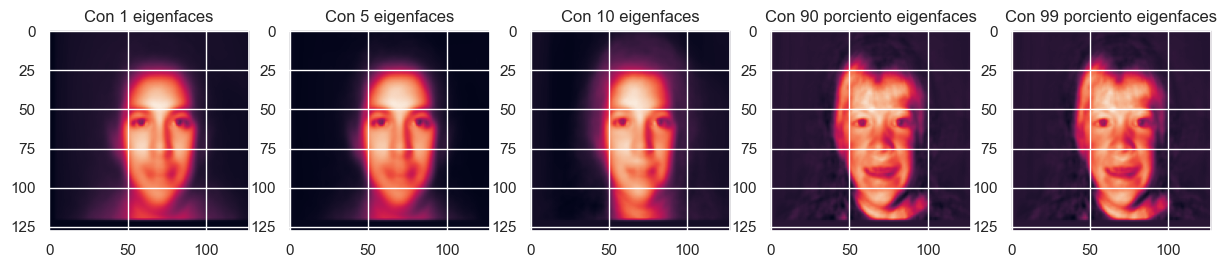

In [9]:
face_1 = X_mean + np.sum(np.dot(X_reduced[3].reshape(1,-1)[:,:1], eigen_faces[:1,:]), axis=0)
face_5 = X_mean + np.sum(np.dot(X_reduced[3].reshape(1,-1)[:,:5],  eigen_faces[:5,:]), axis=0)
face_10 = X_mean + np.sum(np.dot(X_reduced[3].reshape(1,-1)[:,:10],  eigen_faces[:10,:]), axis=0)
face_90 = X_mean + np.sum(np.dot(X_reduced[3].reshape(1,-1)[:,:180], eigen_faces[:180,:]),  axis=0)
face_99 = X_mean + np.sum(np.dot(X_reduced[3].reshape(1,-1)[:,:198], eigen_faces[:198,:]),  axis=0)

fig, ax = plt.subplots(1,5,figsize=(15,15))



plot_1_images(face_1,ax=ax[0],label="Con 1 eigenfaces")
plot_1_images(face_5,ax=ax[1],label="Con 5 eigenfaces")
plot_1_images(face_10,ax=ax[2],label="Con 10 eigenfaces")
plot_1_images(face_90,ax=ax[3],label="Con 90 porciento eigenfaces")
plot_1_images(face_90,ax=ax[4],label="Con 99 porciento eigenfaces")

- Imagen 4:

(None, <Axes: title={'center': 'Con 99 porciento eigenfaces'}>)

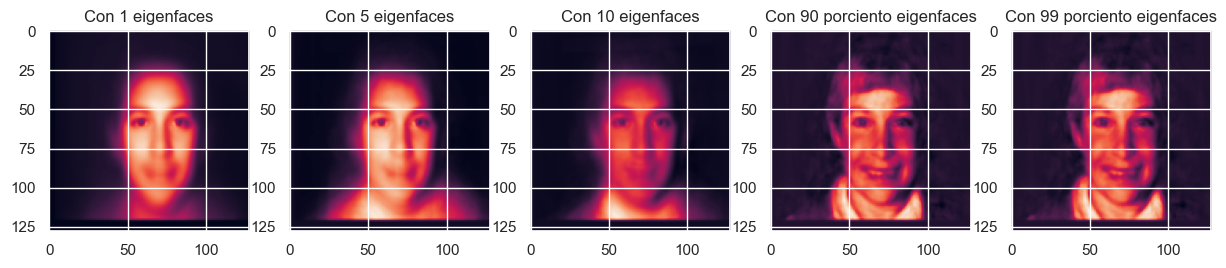

In [10]:
face_1 = X_mean + np.sum(np.dot(X_reduced[4].reshape(1,-1)[:,:1], eigen_faces[:1,:]), axis=0)
face_5 = X_mean + np.sum(np.dot(X_reduced[4].reshape(1,-1)[:,:5],  eigen_faces[:5,:]), axis=0)
face_10 = X_mean + np.sum(np.dot(X_reduced[4].reshape(1,-1)[:,:10],  eigen_faces[:10,:]), axis=0)
face_90 = X_mean + np.sum(np.dot(X_reduced[4].reshape(1,-1)[:,:180], eigen_faces[:180,:]),  axis=0)
face_99 = X_mean + np.sum(np.dot(X_reduced[4].reshape(1,-1)[:,:198], eigen_faces[:198,:]),  axis=0)

fig, ax = plt.subplots(1,5,figsize=(15,15))



plot_1_images(face_1,ax=ax[0],label="Con 1 eigenfaces")
plot_1_images(face_5,ax=ax[1],label="Con 5 eigenfaces")
plot_1_images(face_10,ax=ax[2],label="Con 10 eigenfaces")
plot_1_images(face_90,ax=ax[3],label="Con 90 porciento eigenfaces")
plot_1_images(face_90,ax=ax[4],label="Con 99 porciento eigenfaces")

- Imagen 5:

(None, <Axes: title={'center': 'Con 99 porciento eigenfaces'}>)

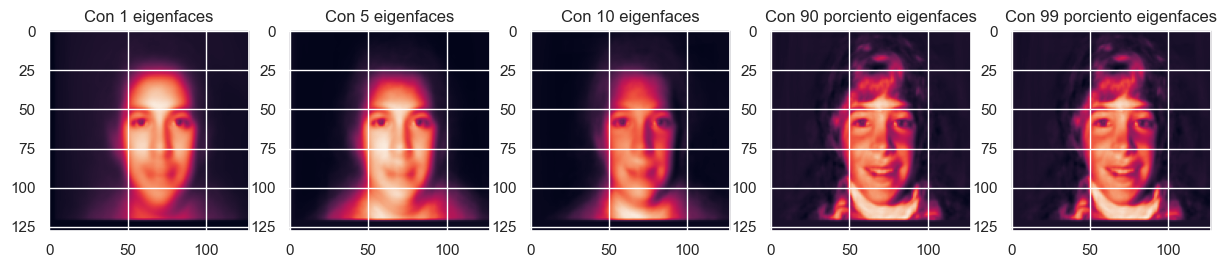

In [11]:
face_1 = X_mean + np.sum(np.dot(X_reduced[5].reshape(1,-1)[:,:1], eigen_faces[:1,:]), axis=0)
face_5 = X_mean + np.sum(np.dot(X_reduced[5].reshape(1,-1)[:,:5],  eigen_faces[:5,:]), axis=0)
face_10 = X_mean + np.sum(np.dot(X_reduced[5].reshape(1,-1)[:,:10],  eigen_faces[:10,:]), axis=0)
face_90 = X_mean + np.sum(np.dot(X_reduced[5].reshape(1,-1)[:,:180], eigen_faces[:180,:]),  axis=0)
face_99 = X_mean + np.sum(np.dot(X_reduced[5].reshape(1,-1)[:,:198], eigen_faces[:198,:]),  axis=0)

fig, ax = plt.subplots(1,5,figsize=(15,15))



plot_1_images(face_1,ax=ax[0],label="Con 1 eigenfaces")
plot_1_images(face_5,ax=ax[1],label="Con 5 eigenfaces")
plot_1_images(face_10,ax=ax[2],label="Con 10 eigenfaces")
plot_1_images(face_90,ax=ax[3],label="Con 90 porciento eigenfaces")
plot_1_images(face_90,ax=ax[4],label="Con 99 porciento eigenfaces")

## 2 K-means

### Utilizar las 3 primeras componentes e implementar el algoritmo k-means sin librerías, crear clase con métodos fit(aprender de los datos) y predict(predecir con los centroides el cluster de un nuevo dato).

In [12]:
class Kmeans:
    
    def __init__(self, k):
        self.k = k
        self.mu = None
        self.his_mu = []
        
    def calculate_labels(self,X):
        # Using Distance formula -2X*MU  + X^2 + MU^2
        dis = -2 * np.dot(X, self.mu.T) 
        dis = dis + np.power(X, 2).sum(axis=1).reshape((-1, 1))
        dis = dis + np.power(self.mu,2).sum(axis=1)
        n_l = dis.argsort(axis=1)[:,0].reshape((-1,1))
        return n_l
    
    def train(self, X, verbose=False):
        X = np.array(X)
        l = np.random.randint(0,high=self.k,size=(X.shape[0],1))
        n_l = None
        while n_l is None or not np.array_equal(l,n_l):
            cur_mu = []
            if n_l is not None:
                l = n_l
            X_l = np.hstack((X,l))
            for i in range(self.k):
                cur_mu.append( 
                    np.mean(
                        X_l[np.where(X_l[:,-1]==i),:-1],
                        axis=1
                    )
                )
            self.mu = np.vstack(cur_mu) 
            self.his_mu.append(self.mu)
            n_l = self.calculate_labels(X)
            if verbose: print(self.mu)
                
    def predict(self,X):
        n_l = self.calculate_labels(X)
        return n_l

Explained variation per principal component: 0.01507537688442213


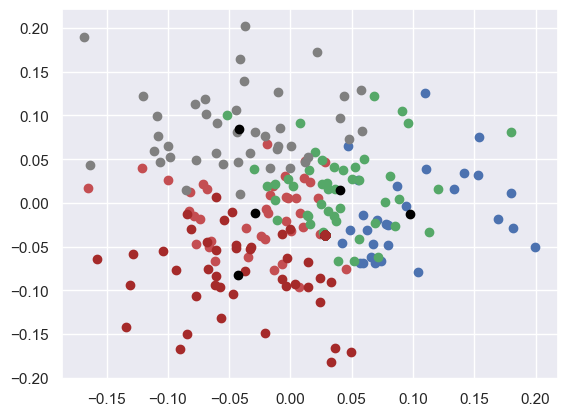

In [13]:
def reduce_dim_pca(components, X_train, X_test):
    """
    This method reduce the dimensionality of the Train and Test Matrix.
    """
    pca = PCA(n_components=components)
    X_r = pca.fit(X_train).transform(X_train)
    X_nr = pca.transform(X_test)
    text = 'Explained variation per principal component: {}'
    print(text.format(np.sum(pca.explained_variance_ratio_[:components])))
    return X_r, X_nr

X_r, X_nr = reduce_dim_pca(3,eigen_faces,eigen_faces)

kmeans = Kmeans(5)
kmeans.train(X_r)
labels = kmeans.predict(X_r)



fig, ax = plt.subplots(1,1)
kmeans = Kmeans(5)
kmeans.train(X_r)
label = kmeans.predict(X_r)
 
ax.scatter(X_r[np.where(label==0),0],X_r[np.where(label==0),1],c='r')
ax.scatter(X_r[np.where(label==1),0],X_r[np.where(label==1),1],c='b')
ax.scatter(X_r[np.where(label==2),0],X_r[np.where(label==2),1],c='g')
ax.scatter(X_r[np.where(label==3),0],X_r[np.where(label==3),1],c='gray')
ax.scatter(X_r[np.where(label==4),0],X_r[np.where(label==4),1],c='brown')
ax.scatter(kmeans.mu[:,0],
           kmeans.mu[:,1], c='black')

## 1. Crear 5 clusters. Seleccione las 3 caras más cercanas al centroide de cada cluster, describa si son similares y porque estan cerca una de la otra.

### 3 Regresion
## 1. Realizar la exploración de los datos correlación, scatter plots, boxplots e histogramas:
# 1.1. ¿Qué variables son importantes para predecir el valor?

In [51]:
df = pd.read_csv("./data/Prueba.csv")
df_test, df_train = train_test_split(df, test_size= 0.2)
df.describe(include = 'all')

C:\Users\jmora\AppData\Local\Temp\ipykernel_10216\810743192.py:1: DtypeWarning: Columns (9,10,11,12,13,14,15,16,17,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("./data/Prueba.csv")


,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,ESTU_EXTERIOR,PERIODO,ESTU_CONSECUTIVO,ESTU_ESTUDIANTE,ESTU_PAIS_RESIDE,ESTU_DISC_FISICA,ESTU_DISC_SISTEM,ESTU_DISC_AUDITCASTELL,ESTU_DISC_AUDITLSC,ESTU_DISC_VISUALCEGUE,ESTU_DISC_VISUALBAJA,ESTU_DISC_VOZHABLA,ESTU_DISC_INTELEC,ESTU_DISC_ESPAUTISTA,ESTU_DISC_PSICOSOCIAL,ESTU_DISC_ASPERGER,ESTU_DEPTO_RESIDE,ESTU_COD_RESIDE_DEPTO,ESTU_MCPIO_RESIDE,ESTU_COD_RESIDE_MCPIO,ESTU_AREARESIDE,ESTU_ESTADOCIVIL,ESTU_COLE_TERMINO,ESTU_CODDANE_COLE_TERMINO,ESTU_COD_COLE_MCPIO_TERMINO,ESTU_OTROCOLE_TERMINO,ESTU_TITULOOBTENIDOBACHILLER,ESTU_PAGOMATRICULABECA,ESTU_PAGOMATRICULACREDITO,ESTU_PAGOMATRICULAPADRES,ESTU_PAGOMATRICULAPROPIO,ESTU_COMOCAPACITOEXAMENSB11,ESTU_TIPODOCUMENTOSB11,ESTU_SEMESTRECURSA,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,FAMI_TRABAJOLABORPADRE,FAMI_TRABAJOLABORMADRE,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_TIENESERVICIOTV,FAMI_TIENECOMPUTADOR,FAMI_TIENELAVADORA,FAMI_TIENEHORNOMICROOGAS,FAMI_TIENEAUTOMOVIL,FAMI_TIENEMOTOCICLETA,FAMI_TIENECONSOLAVIDEOJUEGOS,FAMI_CUANTOSCOMPARTEBAÑO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,INST_COD_INSTITUCION,INST_NOMBRE_INSTITUCION,ESTU_PRGM_ACADEMICO,ESTU_SNIES_PRGMACADEMICO,GRUPOREFERENCIA,ESTU_PRGM_CODMUNICIPIO,ESTU_PRGM_MUNICIPIO,ESTU_PRGM_DEPARTAMENTO,ESTU_NIVEL_PRGM_ACADEMICO,ESTU_METODO_PRGM,ESTU_NUCLEO_PREGRADO,ESTU_INST_CODMUNICIPIO,ESTU_INST_MUNICIPIO,ESTU_INST_DEPARTAMENTO,INST_CARACTER_ACADEMICO,INST_ORIGEN,ESTU_PRIVADO_LIBERTAD,ESTU_COD_MCPIO_PRESENTACION,ESTU_MCPIO_PRESENTACION,ESTU_DEPTO_PRESENTACION,ESTU_COD_DEPTO_PRESENTACION,MOD_RAZONA_CUANTITAT_PUNT,MOD_RAZONA_CUANTITATIVO_PNAL,MOD_RAZONA_CUANTITATIVO_PNBC,MOD_LECTURA_CRITICA_PUNT,MOD_LECTURA_CRITICA_PNAL,MOD_LECTURA_CRITICA_PNBC,MOD_COMPETEN_CIUDADA_PUNT,MOD_COMPETEN_CIUDADA_PNAL,MOD_COMPETEN_CIUDADA_PNBC,MOD_INGLES_PUNT,MOD_INGLES_DESEM,MOD_INGLES_PNAL,MOD_INGLES_PNBC,MOD_COMUNI_ESCRITA_PUNT,MOD_COMUNI_ESCRITA_DESEM,MOD_COMUNI_ESCRITA_PNAL,MOD_COMUNI_ESCRITA_PNBC,PUNT_GLOBAL,PERCENTIL_GLOBAL,PERCENTIL_NBC,ESTU_ESTADOINVESTIGACION
count,68725,68725,68597,68667,68725,68725.0,68725,68725,68725,27,3,8,8,1,10,1,3,1,2,2,68688,68688.000000,68688,68688.00000,58499,58190,37609,3.760900e+04,37609.000000,11543,58465,58461,58461,58463,58461,58475,57799,58465,65210,65100,56760,60492,64573,64460,64325,64056,64006,63846,63817,63840,63783,63863,63706,63606,68725.000000,68725,68725,68661.000000,68725,68725.00000,68725,68725,68725,68725,68725,68725.000000,68725,68725,68725,68725,68725,68725.000000,68725,68725,68725.000000,68725.000000,68567.000000,68566.000000,68725.000000,68567.000000,68566.000000,68725.000000,68567.000000,68566.000000,68705.000000,68705,68567.000000,68566.000000,67851.000000,58108.000000,67696.000000,67695.000000,68725.000000,68567.000000,68566.000000,68725
unique,6,17,2,10735,1,NaN,68725,1,17,1,1,1,1,1,1,1,1,1,1,1,34,NaN,913,NaN,2,4,7201,NaN,NaN,9655,3,2,2,2,2,3,5,12,12,12,13,13,7,2,2,2,2,2,2,2,2,6,7,5,NaN,184,982,NaN,20,NaN,136,32,2,3,50,NaN,51,25,5,6,1,NaN,3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,CC,COLOMBIA,M,09/21/2000 12:00:00 AM,NO,NaN,EK202010002443,ESTUDIANTE,COLOMBIA,x,x,x,x,x,x,x,x,x,x,x,BOGOTÁ,NaN,BOGOTÁ D.C.,NaN,Cabecera Municipal,Soltero,INST EDUC CEFA,NaN,NaN,otro,Bachiller académico,No,No,No,No,Repasó por cuenta propia,TI,4,Primaria incompleta,Secundaria (Bachillerato) completa,Trabaja por cuenta propia (por ejemplo plomero...,"Trabaja en el hogar, no trabaja o estudia",Estrato 2,Si,Si,Si,Si,No,No,No,No,3 o 4,No pago semestre,Más de 30 horas,NaN,SERVICIO NACIONAL DE APRENDIZAJE-SENA,TECNOLOGÍA EN CONTABILIDAD Y FINANZAS,NaN,TECNOLÓGICO EN ADMINISTRACIÓN Y TURISMO,NaN,BOGOTÁ D.C.,BOGOTÁ,TECNOLOGÍA,PRESENCIAL,ADMINISTRACIÓN,NaN,BOGOTÁ D.C.,BOGOTÁ,INSTITUCIÓN TECNOLÓGICA,OFICIAL NACIONAL,N,NaN,BOGOTÁ D.C.,BOGOTÁ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PUBLICAR
freq,67218,68663,34798,45,68725,NaN,1,68725,68663,27,3,8,8,1,10,1,3

In [52]:
util_varables = df_train.drop(['ESTU_DISC_AUDITCASTELL', 'ESTU_DISC_AUDITLSC','ESTU_DISC_VISUALCEGUE','ESTU_DISC_VISUALBAJA', 'ESTU_DISC_VOZHABLA', 'ESTU_DISC_INTELEC','ESTU_DISC_ESPAUTISTA','ESTU_DISC_PSICOSOCIAL', 'ESTU_DISC_ASPERGER',
                         'ESTU_CONSECUTIVO','ESTU_ESTUDIANTE','ESTU_DISC_FISICA','ESTU_DISC_SISTEM', 'ESTU_CODDANE_COLE_TERMINO', 'ESTU_COD_COLE_MCPIO_TERMINO', 'ESTU_COD_RESIDE_MCPIO', 'INST_COD_INSTITUCION',
                         'ESTU_SNIES_PRGMACADEMICO','ESTU_PRGM_CODMUNICIPIO', 'ESTU_INST_CODMUNICIPIO','ESTU_COD_MCPIO_PRESENTACION', 'ESTU_COD_DEPTO_PRESENTACION', 'MOD_RAZONA_CUANTITAT_PUNT', 'MOD_RAZONA_CUANTITATIVO_PNAL',
                         'MOD_RAZONA_CUANTITATIVO_PNBC', 'MOD_LECTURA_CRITICA_PUNT', 'MOD_LECTURA_CRITICA_PNAL', 'MOD_LECTURA_CRITICA_PNBC', 'MOD_COMPETEN_CIUDADA_PUNT', 'MOD_COMPETEN_CIUDADA_PNAL', 'MOD_COMPETEN_CIUDADA_PNBC',
                         'MOD_INGLES_PUNT', 'MOD_INGLES_DESEM', 'MOD_INGLES_PNAL', 'MOD_INGLES_PNBC', 'MOD_COMUNI_ESCRITA_PUNT', 'MOD_COMUNI_ESCRITA_DESEM', 'MOD_COMUNI_ESCRITA_PNAL', 'MOD_COMUNI_ESCRITA_PNBC',
                         'PERCENTIL_GLOBAL', 'PERCENTIL_NBC', 'ESTU_COD_RESIDE_DEPTO', 'PERIODO'], axis=1)
util_varables.describe(include='all')

,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,ESTU_EXTERIOR,ESTU_PAIS_RESIDE,ESTU_DEPTO_RESIDE,ESTU_MCPIO_RESIDE,ESTU_AREARESIDE,ESTU_ESTADOCIVIL,ESTU_COLE_TERMINO,ESTU_OTROCOLE_TERMINO,ESTU_TITULOOBTENIDOBACHILLER,ESTU_PAGOMATRICULABECA,ESTU_PAGOMATRICULACREDITO,ESTU_PAGOMATRICULAPADRES,ESTU_PAGOMATRICULAPROPIO,ESTU_COMOCAPACITOEXAMENSB11,ESTU_TIPODOCUMENTOSB11,ESTU_SEMESTRECURSA,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,FAMI_TRABAJOLABORPADRE,FAMI_TRABAJOLABORMADRE,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_TIENESERVICIOTV,FAMI_TIENECOMPUTADOR,FAMI_TIENELAVADORA,FAMI_TIENEHORNOMICROOGAS,FAMI_TIENEAUTOMOVIL,FAMI_TIENEMOTOCICLETA,FAMI_TIENECONSOLAVIDEOJUEGOS,FAMI_CUANTOSCOMPARTEBAÑO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,INST_NOMBRE_INSTITUCION,ESTU_PRGM_ACADEMICO,GRUPOREFERENCIA,ESTU_PRGM_MUNICIPIO,ESTU_PRGM_DEPARTAMENTO,ESTU_NIVEL_PRGM_ACADEMICO,ESTU_METODO_PRGM,ESTU_NUCLEO_PREGRADO,ESTU_INST_MUNICIPIO,ESTU_INST_DEPARTAMENTO,INST_CARACTER_ACADEMICO,INST_ORIGEN,ESTU_PRIVADO_LIBERTAD,ESTU_MCPIO_PRESENTACION,ESTU_DEPTO_PRESENTACION,PUNT_GLOBAL,ESTU_ESTADOINVESTIGACION
count,13745,13745,13711,13730,13745,13745,13741,13741,11577,11511,7495,2249,11570,11570,11570,11570,11570,11571,11439,11570,13077,13051,11394,12125,12957,12944,12909,12845,12833,12801,12796,12803,12780,12805,12757,12724,13745,13745,13745,13745,13745,13745,13745,13745,13745,13745,13745,13745,13745,13745,13745,13745.000000,13745
unique,5,7,2,6126,1,7,33,632,2,4,3700,2136,3,2,2,2,2,3,5,12,12,12,13,13,7,2,2,2,2,2,2,2,2,6,7,5,170,765,19,121,31,2,3,46,45,23,5,6,1,3,3,NaN,2
top,CC,COLOMBIA,M,10/26/2000 12:00:00 AM,NO,COLOMBIA,BOGOTÁ,BOGOTÁ D.C.,Cabecera Municipal,Soltero,INST EDUC CEFA,OTRO,Bachiller académico,No,No,No,No,Repasó por cuenta propia,TI,4,Primaria incompleta,Secundaria (Bachillerato) completa,Trabaja por cuenta propia (por ejemplo plomero...,"Trabaja en el hogar, no trabaja o estudia",Estrato 2,Si,Si,Si,Si,No,No,No,No,3 o 4,No pago semestre,Más de 30 horas,SERVICIO NACIONAL DE APRENDIZAJE-SENA,TECNOLOGÍA EN CONTABILIDAD Y FINANZAS,TECNOLÓGICO EN ADMINISTRACIÓN Y TURISMO,BOGOTÁ D.C.,BOGOTÁ,TECNOLOGÍA,PRESENCIAL,ADMINISTRACIÓN,BOGOTÁ D.C.,BOGOTÁ,INSTITUCIÓN TECNOLÓGICA,OFICIAL NACIONAL,N,BOGOTÁ D.C.,BOGOTÁ,NaN,PUBLICAR
freq,13457,13736,6904,14,13745,13736,4064,4064,9730,9102,29,6,7859,9515,10369,8431,8134,8339,7126,4320,3328,3264,1958,5843,6001,11334,9474,11172,10275,7733,10585,8006,10693,6236,8108,5315,9113,678,5831,5047,5047,12247,12108,4758,11403,11403,9890,10357,13745,13618,13618,NaN,13685
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93.439724,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.201024,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,108.000000,NaN


In [53]:
col = ['ESTU_TIPODOCUMENTO','ESTU_NACIONALIDAD','ESTU_GENERO','ESTU_EXTERIOR',
       'ESTU_PAIS_RESIDE','ESTU_DEPTO_RESIDE','ESTU_AREARESIDE','ESTU_ESTADOCIVIL',
       'ESTU_TITULOOBTENIDOBACHILLER','ESTU_PAGOMATRICULABECA',
       'ESTU_PAGOMATRICULACREDITO','ESTU_PAGOMATRICULAPADRES','ESTU_PAGOMATRICULAPROPIO','ESTU_COMOCAPACITOEXAMENSB11'
       ,'ESTU_TIPODOCUMENTOSB11','ESTU_SEMESTRECURSA','FAMI_EDUCACIONPADRE','FAMI_EDUCACIONMADRE','FAMI_TRABAJOLABORPADRE',
       'FAMI_TRABAJOLABORMADRE','FAMI_ESTRATOVIVIENDA','FAMI_TIENEINTERNET','FAMI_TIENESERVICIOTV','FAMI_TIENECOMPUTADOR',
       'FAMI_TIENELAVADORA','FAMI_TIENEHORNOMICROOGAS','FAMI_TIENEAUTOMOVIL','FAMI_TIENEMOTOCICLETA','FAMI_TIENECONSOLAVIDEOJUEGOS',
       'FAMI_CUANTOSCOMPARTEBAÑO','ESTU_VALORMATRICULAUNIVERSIDAD','ESTU_HORASSEMANATRABAJA',
       'GRUPOREFERENCIA','ESTU_PRGM_DEPARTAMENTO','ESTU_NIVEL_PRGM_ACADEMICO','ESTU_METODO_PRGM',
       'ESTU_INST_DEPARTAMENTO','INST_CARACTER_ACADEMICO','INST_ORIGEN','ESTU_PRIVADO_LIBERTAD','ESTU_MCPIO_PRESENTACION'
       ,'ESTU_DEPTO_PRESENTACION','ESTU_ESTADOINVESTIGACION']

aparte = ['ESTU_FECHANACIMIENTO','ESTU_MCPIO_RESIDE','ESTU_COLE_TERMINO','ESTU_OTROCOLE_TERMINO','INST_NOMBRE_INSTITUCION',
          'ESTU_PRGM_ACADEMICO','ESTU_PRGM_MUNICIPIO','ESTU_NUCLEO_PREGRADO',
          'ESTU_INST_MUNICIPIO']


In [54]:
util_varables.describe(include='all')

,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,ESTU_EXTERIOR,ESTU_PAIS_RESIDE,ESTU_DEPTO_RESIDE,ESTU_MCPIO_RESIDE,ESTU_AREARESIDE,ESTU_ESTADOCIVIL,ESTU_COLE_TERMINO,ESTU_OTROCOLE_TERMINO,ESTU_TITULOOBTENIDOBACHILLER,ESTU_PAGOMATRICULABECA,ESTU_PAGOMATRICULACREDITO,ESTU_PAGOMATRICULAPADRES,ESTU_PAGOMATRICULAPROPIO,ESTU_COMOCAPACITOEXAMENSB11,ESTU_TIPODOCUMENTOSB11,ESTU_SEMESTRECURSA,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,FAMI_TRABAJOLABORPADRE,FAMI_TRABAJOLABORMADRE,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_TIENESERVICIOTV,FAMI_TIENECOMPUTADOR,FAMI_TIENELAVADORA,FAMI_TIENEHORNOMICROOGAS,FAMI_TIENEAUTOMOVIL,FAMI_TIENEMOTOCICLETA,FAMI_TIENECONSOLAVIDEOJUEGOS,FAMI_CUANTOSCOMPARTEBAÑO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,INST_NOMBRE_INSTITUCION,ESTU_PRGM_ACADEMICO,GRUPOREFERENCIA,ESTU_PRGM_MUNICIPIO,ESTU_PRGM_DEPARTAMENTO,ESTU_NIVEL_PRGM_ACADEMICO,ESTU_METODO_PRGM,ESTU_NUCLEO_PREGRADO,ESTU_INST_MUNICIPIO,ESTU_INST_DEPARTAMENTO,INST_CARACTER_ACADEMICO,INST_ORIGEN,ESTU_PRIVADO_LIBERTAD,ESTU_MCPIO_PRESENTACION,ESTU_DEPTO_PRESENTACION,PUNT_GLOBAL,ESTU_ESTADOINVESTIGACION
count,13745,13745,13711,13730,13745,13745,13741,13741,11577,11511,7495,2249,11570,11570,11570,11570,11570,11571,11439,11570,13077,13051,11394,12125,12957,12944,12909,12845,12833,12801,12796,12803,12780,12805,12757,12724,13745,13745,13745,13745,13745,13745,13745,13745,13745,13745,13745,13745,13745,13745,13745,13745.000000,13745
unique,5,7,2,6126,1,7,33,632,2,4,3700,2136,3,2,2,2,2,3,5,12,12,12,13,13,7,2,2,2,2,2,2,2,2,6,7,5,170,765,19,121,31,2,3,46,45,23,5,6,1,3,3,NaN,2
top,CC,COLOMBIA,M,10/26/2000 12:00:00 AM,NO,COLOMBIA,BOGOTÁ,BOGOTÁ D.C.,Cabecera Municipal,Soltero,INST EDUC CEFA,OTRO,Bachiller académico,No,No,No,No,Repasó por cuenta propia,TI,4,Primaria incompleta,Secundaria (Bachillerato) completa,Trabaja por cuenta propia (por ejemplo plomero...,"Trabaja en el hogar, no trabaja o estudia",Estrato 2,Si,Si,Si,Si,No,No,No,No,3 o 4,No pago semestre,Más de 30 horas,SERVICIO NACIONAL DE APRENDIZAJE-SENA,TECNOLOGÍA EN CONTABILIDAD Y FINANZAS,TECNOLÓGICO EN ADMINISTRACIÓN Y TURISMO,BOGOTÁ D.C.,BOGOTÁ,TECNOLOGÍA,PRESENCIAL,ADMINISTRACIÓN,BOGOTÁ D.C.,BOGOTÁ,INSTITUCIÓN TECNOLÓGICA,OFICIAL NACIONAL,N,BOGOTÁ D.C.,BOGOTÁ,NaN,PUBLICAR
freq,13457,13736,6904,14,13745,13736,4064,4064,9730,9102,29,6,7859,9515,10369,8431,8134,8339,7126,4320,3328,3264,1958,5843,6001,11334,9474,11172,10275,7733,10585,8006,10693,6236,8108,5315,9113,678,5831,5047,5047,12247,12108,4758,11403,11403,9890,10357,13745,13618,13618,NaN,13685
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93.439724,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.201024,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,108.000000,NaN


In [55]:
dummy_variables = pd.get_dummies(util_varables[col],prefix=col,dummy_na=True,drop_first=True)
df_final = pd.concat((dummy_variables,util_varables['PUNT_GLOBAL']),axis = 1)
df_final.describe()

,ESTU_TIPODOCUMENTO_CE,ESTU_TIPODOCUMENTO_CR,ESTU_TIPODOCUMENTO_PE,ESTU_TIPODOCUMENTO_TI,ESTU_TIPODOCUMENTO_nan,ESTU_NACIONALIDAD_BOLIVIA,ESTU_NACIONALIDAD_COLOMBIA,ESTU_NACIONALIDAD_EL SALVADOR,ESTU_NACIONALIDAD_ESPAÑA,ESTU_NACIONALIDAD_ESTADOS UNIDOS,ESTU_NACIONALIDAD_VENEZUELA,ESTU_NACIONALIDAD_nan,ESTU_GENERO_M,ESTU_GENERO_nan,ESTU_EXTERIOR_nan,ESTU_PAIS_RESIDE_BOLIVIA,ESTU_PAIS_RESIDE_COLOMBIA,ESTU_PAIS_RESIDE_EL SALVADOR,ESTU_PAIS_RESIDE_ESPAÑA,ESTU_PAIS_RESIDE_ESTADOS UNIDOS,ESTU_PAIS_RESIDE_VENEZUELA,ESTU_PAIS_RESIDE_nan,ESTU_DEPTO_RESIDE_ANTIOQUIA,ESTU_DEPTO_RESIDE_ARAUCA,ESTU_DEPTO_RESIDE_ATLANTICO,ESTU_DEPTO_RESIDE_BOGOTÁ,ESTU_DEPTO_RESIDE_BOLIVAR,ESTU_DEPTO_RESIDE_BOYACA,ESTU_DEPTO_RESIDE_CALDAS,ESTU_DEPTO_RESIDE_CAQUETA,ESTU_DEPTO_RESIDE_CASANARE,ESTU_DEPTO_RESIDE_CAUCA,ESTU_DEPTO_RESIDE_CESAR,ESTU_DEPTO_RESIDE_CHOCO,ESTU_DEPTO_RESIDE_CORDOBA,ESTU_DEPTO_RESIDE_CUNDINAMARCA,ESTU_DEPTO_RESIDE_EXTRANJERO,ESTU_DEPTO_RESIDE_GUAVIARE,ESTU_DEPTO_RESIDE_HUILA,ESTU_DEPTO_RESIDE_LA GUAJIRA,ESTU_DEPTO_RESIDE_MAGDALENA,ESTU_DEPTO_RESIDE_META,ESTU_DEPTO_RESIDE_NARIÑO,ESTU_DEPTO_RESIDE_NORTE SANTANDER,ESTU_DEPTO_RESIDE_PUTUMAYO,ESTU_DEPTO_RESIDE_QUINDIO,ESTU_DEPTO_RESIDE_RISARALDA,ESTU_DEPTO_RESIDE_SAN ANDRES,ESTU_DEPTO_RESIDE_SANTANDER,ESTU_DEPTO_RESIDE_SUCRE,ESTU_DEPTO_RESIDE_TOLIMA,ESTU_DEPTO_RESIDE_VALLE,ESTU_DEPTO_RESIDE_VAUPES,ESTU_DEPTO_RESIDE_VICHADA,ESTU_DEPTO_RESIDE_nan,ESTU_AREARESIDE_Cabecera Municipal,ESTU_AREARESIDE_nan,ESTU_ESTADOCIVIL_Separado y/o Viudo,ESTU_ESTADOCIVIL_Soltero,ESTU_ESTADOCIVIL_Unión libre,ESTU_ESTADOCIVIL_nan,ESTU_TITULOOBTENIDOBACHILLER_Bachiller pedagógico o normalista,ESTU_TITULOOBTENIDOBACHILLER_Bachiller técnico,ESTU_TITULOOBTENIDOBACHILLER_nan,ESTU_PAGOMATRICULABECA_Si,ESTU_PAGOMATRICULABECA_nan,ESTU_PAGOMATRICULACREDITO_Si,ESTU_PAGOMATRICULACREDITO_nan,ESTU_PAGOMATRICULAPADRES_Si,ESTU_PAGOMATRICULAPADRES_nan,ESTU_PAGOMATRICULAPROPIO_Si,ESTU_PAGOMATRICULAPROPIO_nan,ESTU_COMOCAPACITOEXAMENSB11_Repasó por cuenta propia,ESTU_COMOCAPACITOEXAMENSB11_Tomó un curso de preparación,ESTU_COMOCAPACITOEXAMENSB11_nan,ESTU_TIPODOCUMENTOSB11_CE,ESTU_TIPODOCUMENTOSB11_CR,ESTU_TIPODOCUMENTOSB11_PE,ESTU_TIPODOCUMENTOSB11_TI,ESTU_TIPODOCUMENTOSB11_nan,ESTU_SEMESTRECURSA_10,ESTU_SEMESTRECURSA_11,ESTU_SEMESTRECURSA_12 o más,ESTU_SEMESTRECURSA_2,ESTU_SEMESTRECURSA_3,ESTU_SEMESTRECURSA_4,ESTU_SEMESTRECURSA_5,ESTU_SEMESTRECURSA_6,ESTU_SEMESTRECURSA_7,ESTU_SEMESTRECURSA_8,ESTU_SEMESTRECURSA_9,ESTU_SEMESTRECURSA_nan,FAMI_EDUCACIONPADRE_Educación profesional incompleta,FAMI_EDUCACIONPADRE_Ninguno,FAMI_EDUCACIONPADRE_No Aplica,FAMI_EDUCACIONPADRE_No sabe,FAMI_EDUCACIONPADRE_Postgrado,FAMI_EDUCACIONPADRE_Primaria completa,FAMI_EDUCACIONPADRE_Primaria incompleta,FAMI_EDUCACIONPADRE_Secundaria (Bachillerato) completa,FAMI_EDUCACIONPADRE_Secundaria (Bachillerato) incompleta,FAMI_EDUCACIONPADRE_Técnica o tecnológica completa,FAMI_EDUCACIONPADRE_Técnica o tecnológica incompleta,FAMI_EDUCACIONPADRE_nan,FAMI_EDUCACIONMADRE_Educación profesional incompleta,FAMI_EDUCACIONMADRE_Ninguno,FAMI_EDUCACIONMADRE_No Aplica,FAMI_EDUCACIONMADRE_No sabe,FAMI_EDUCACIONMADRE_Postgrado,FAMI_EDUCACIONMADRE_Primaria completa,FAMI_EDUCACIONMADRE_Primaria incompleta,FAMI_EDUCACIONMADRE_Secundaria (Bachillerato) completa,FAMI_EDUCACIONMADRE_Secundaria (Bachillerato) incompleta,FAMI_EDUCACIONMADRE_Técnica o tecnológica completa,FAMI_EDUCACIONMADRE_Técnica o tecnológica incompleta,FAMI_EDUCACIONMADRE_nan,"FAMI_TRABAJOLABORPADRE_Es dueño de un negocio grande, tiene un cargo de nivel directivo o gerencial","FAMI_TRABAJOLABORPADRE_Es dueño de un negocio pequeño (tiene pocos empleados o no tiene, por ejemplo tienda, papelería, etc","FAMI_TRABAJOLABORPADRE_Es operario de máquinas o conduce vehículos (taxita, chofer)",FAMI_TRABAJOLABORPADRE_Es vendedor o trabaja en atención al público,FAMI_TRABAJOLABORPADRE_No aplica,FAMI_TRABAJOLABORPADRE_No sabe,FAMI_TRABAJOLABORPADRE_Pensionado,"FAMI_TRABAJOLABORPADRE_Tiene un trabajo de tipo auxiliar administrativo 

In [56]:
y = df_final['PUNT_GLOBAL']
x = dummy_variables
x = sm.add_constant(x)
model = sm.OLS(y,x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            PUNT_GLOBAL   R-squared:                       0.227
Model:                            OLS   Adj. R-squared:                  0.213
Method:                 Least Squares   F-statistic:                     15.80
Date:                Fri, 05 May 2023   Prob (F-statistic):               0.00
Time:                        15:15:31   Log-Likelihood:                -59046.
No. Observations:               13745   AIC:                         1.186e+05
Df Residuals:                   13493   BIC:                         1.205e+05
Df Model:                         251                                         
Covariance Type:            nonrobust                                         
                                                                                                                                  coef    std err          t      P>|t|      [0.025      0.975]
------------------

In [58]:
cols = ['ESTU_TIPODOCUMENTO_CR',
'ESTU_TIPODOCUMENTO_TI',
'ESTU_NACIONALIDAD_HAITI',
'ESTU_NACIONALIDAD_NICARAGUA',
'ESTU_GENERO_M',
'ESTU_EXTERIOR_nan',
'ESTU_PAIS_RESIDE_HAITI',
'ESTU_PAIS_RESIDE_NICARAGUA',
'ESTU_PAIS_RESIDE_nan',
'ESTU_AREARESIDE_Cabecera Municipal',
'ESTU_ESTADOCIVIL_Soltero',
'ESTU_ESTADOCIVIL_Unión libre',
'ESTU_ESTADOCIVIL_nan',
'ESTU_TITULOOBTENIDOBACHILLER_Bachiller pedagógico o normalista',
'ESTU_TITULOOBTENIDOBACHILLER_Bachiller técnico',
'ESTU_PAGOMATRICULABECA_Si',
'ESTU_PAGOMATRICULACREDITO_Si',
'ESTU_COMOCAPACITOEXAMENSB11_Repasó por cuenta propia',
'ESTU_COMOCAPACITOEXAMENSB11_Tomó un curso de preparación',
'ESTU_TIPODOCUMENTOSB11_CE',
'ESTU_TIPODOCUMENTOSB11_CR',
'ESTU_TIPODOCUMENTOSB11_TI',
'ESTU_TIPODOCUMENTOSB11_nan',
'ESTU_SEMESTRECURSA_10',
'ESTU_SEMESTRECURSA_2',
'ESTU_SEMESTRECURSA_3',
'ESTU_SEMESTRECURSA_4',
'ESTU_SEMESTRECURSA_5',
'ESTU_SEMESTRECURSA_6',
'ESTU_SEMESTRECURSA_7',
'ESTU_SEMESTRECURSA_8',
'ESTU_SEMESTRECURSA_9',
'FAMI_EDUCACIONPADRE_Ninguno',
'FAMI_EDUCACIONPADRE_No Aplica',
'FAMI_EDUCACIONPADRE_Postgrado',
'FAMI_EDUCACIONPADRE_Primaria completa',
'FAMI_EDUCACIONPADRE_Primaria incompleta',
'FAMI_EDUCACIONPADRE_Secundaria (Bachillerato) completa',
'FAMI_EDUCACIONPADRE_Secundaria (Bachillerato) incompleta',
'FAMI_EDUCACIONPADRE_Técnica o tecnológica completa',
'FAMI_EDUCACIONPADRE_Técnica o tecnológica incompleta',
'FAMI_EDUCACIONPADRE_nan',
'FAMI_EDUCACIONMADRE_Ninguno',
'FAMI_EDUCACIONMADRE_No Aplica',
'FAMI_EDUCACIONMADRE_Postgrado',
'FAMI_EDUCACIONMADRE_Primaria completa',
'FAMI_EDUCACIONMADRE_Primaria incompleta',
'FAMI_EDUCACIONMADRE_Secundaria (Bachillerato) completa',
'FAMI_EDUCACIONMADRE_Secundaria (Bachillerato) incompleta',
'FAMI_EDUCACIONMADRE_Técnica o tecnológica incompleta',
'FAMI_EDUCACIONMADRE_nan',
'FAMI_TRABAJOLABORPADRE_Es dueño de un negocio grande, tiene un cargo de nivel directivo o gerencial',
'FAMI_TRABAJOLABORPADRE_Es operario de máquinas o conduce vehículos (taxita, chofer)',
'FAMI_TRABAJOLABORPADRE_Es vendedor o trabaja en atención al público',
'FAMI_TRABAJOLABORPADRE_Pensionado',
'FAMI_TRABAJOLABORPADRE_Tiene un trabajo de tipo auxiliar administrativo (por ejemplo, secretario o asistente)',
'FAMI_TRABAJOLABORPADRE_Trabaja como personal de limpieza, mantenimiento, seguridad o construcción',
'FAMI_TRABAJOLABORPADRE_Trabaja por cuenta propia (por ejemplo plomero, electricista)',
'FAMI_TRABAJOLABORPADRE_nan',
'FAMI_TRABAJOLABORMADRE_Es dueño de un negocio grande, tiene un cargo de nivel directivo o gerencial',
'FAMI_TRABAJOLABORMADRE_No sabe',
'FAMI_TRABAJOLABORMADRE_Pensionado',
'FAMI_TRABAJOLABORMADRE_Trabaja como personal de limpieza, mantenimiento, seguridad o construcción',
'FAMI_TRABAJOLABORMADRE_Trabaja en el hogar, no trabaja o estudia',
'FAMI_TRABAJOLABORMADRE_Trabaja por cuenta propia (por ejemplo plomero, electricista)',
'FAMI_TRABAJOLABORMADRE_nan',
'FAMI_ESTRATOVIVIENDA_Estrato 2',
'FAMI_ESTRATOVIVIENDA_Estrato 3',
'FAMI_ESTRATOVIVIENDA_Estrato 4',
'FAMI_ESTRATOVIVIENDA_Estrato 5',
'FAMI_TIENEINTERNET_Si',
'FAMI_TIENESERVICIOTV_Si',
'FAMI_TIENECOMPUTADOR_Si',
'FAMI_TIENECOMPUTADOR_nan',
'FAMI_TIENELAVADORA_Si',
'FAMI_TIENEHORNOMICROOGAS_Si',
'FAMI_TIENEHORNOMICROOGAS_nan',
'FAMI_TIENEAUTOMOVIL_Si',
'FAMI_TIENEMOTOCICLETA_Si',
'FAMI_TIENECONSOLAVIDEOJUEGOS_Si',
'FAMI_CUANTOSCOMPARTEBAÑO_2',
'FAMI_CUANTOSCOMPARTEBAÑO_3 o 4',
'FAMI_CUANTOSCOMPARTEBAÑO_5 o 6',
'FAMI_CUANTOSCOMPARTEBAÑO_MAS DE 6',
'FAMI_CUANTOSCOMPARTEBAÑO_NINGUNA',
'ESTU_VALORMATRICULAUNIVERSIDAD_Entre 5 y 7 millones',
'ESTU_VALORMATRICULAUNIVERSIDAD_Entre 500 mil y un millon de pesos',
'ESTU_VALORMATRICULAUNIVERSIDAD_Mas de 7 millones',
'ESTU_HORASSEMANATRABAJA_Entre 11 y 20 horas',
'ESTU_HORASSEMANATRABAJA_Menos de 10 horas',
'ESTU_HORASSEMANATRABAJA_Más de 30 horas',
'GRUPOREFERENCIA_NORMALES SUPERIORES',
'ESTU_METODO_PRGM_DISTANCIA VITUAL',
'ESTU_INST_DEPARTAMENTO_ATLANTICO',
'ESTU_INST_DEPARTAMENTO_BOYACA',
'ESTU_INST_DEPARTAMENTO_CALDAS',
'ESTU_INST_DEPARTAMENTO_CASANARE',
'ESTU_INST_DEPARTAMENTO_HUILA',
'ESTU_INST_DEPARTAMENTO_MAGDALENA',
'ESTU_INST_DEPARTAMENTO_PUTUMAYO',
'ESTU_INST_DEPARTAMENTO_RISARALDA',
'ESTU_INST_DEPARTAMENTO_SANTANDER',
'ESTU_INST_DEPARTAMENTO_TOLIMA',
'INST_CARACTER_ACADEMICO_INSTITUCIÓN TECNOLÓGICA',
'INST_CARACTER_ACADEMICO_INSTITUCIÓN UNIVERSITARIA',
'INST_CARACTER_ACADEMICO_TÉCNICA PROFESIONAL',
'INST_CARACTER_ACADEMICO_UNIVERSIDAD',
'INST_ORIGEN_NO OFICIAL - FUNDACIÓN',
'INST_ORIGEN_OFICIAL DEPARTAMENTAL',
'INST_ORIGEN_OFICIAL MUNICIPAL',
'INST_ORIGEN_REGIMEN ESPECIAL',
'ESTU_ESTADOINVESTIGACION_VALIDEZ OFICINA JURÍDICA',
]


new_y = df_final.drop(cols,axis=1)
new_x = new_y.drop('PUNT_GLOBAL',axis=1)

y = new_y['PUNT_GLOBAL']
x = new_x
x = sm.add_constant(x)
model = sm.OLS(y,x).fit()
print(model.summary())


KeyError: "['ESTU_NACIONALIDAD_HAITI', 'ESTU_NACIONALIDAD_NICARAGUA', 'ESTU_PAIS_RESIDE_HAITI', 'ESTU_PAIS_RESIDE_NICARAGUA'] not found in axis"

### Se le hace modificaicones al modelo para algo

In [ ]:
ix_mun = set([i for i,v, in zip(util_varables["ESTU_MCPIO_RESIDE"].value_counts().index,df["ESTU_MCPIO_RESIDE"].value_counts().values) if v > 30])
util_varables["ESTU_MCPIO_RESIDE_DE30"] = util_varables["ESTU_MCPIO_RESIDE"].apply(lambda x: x if x in ix_mun else 'otros')
util_varables["ESTU_MCPIO_RESIDE_DE30"].value_counts()


util_varables["ESTU_FECHANACIMIENTO"].apply(lambda x: len(str(x))).value_counts()
actualDate = pd.Timestamp('now')
util_varables["ESTU_EDAD"] = (actualDate - pd.to_datetime(util_varables["ESTU_FECHANACIMIENTO"],errors="coerce")).astype('<m8[Y]')

In [21]:
pandas_by_institution = df[['ESTU_COLE_TERMINO','PUNT_GLOBAL']].groupby('ESTU_COLE_TERMINO').agg(['count', 'mean'])
pandas_by_institution_a = df[['ESTU_COLE_TERMINO','PUNT_GLOBAL']].groupby('ESTU_COLE_TERMINO').count()
escuelas_nuevas = list(pandas_by_institution_a.query("PUNT_GLOBAL>30").index)
df["New_School"] = df.ESTU_COLE_TERMINO.apply(lambda x: x if x in escuelas_nuevas else 'otros')
df[['New_School','PUNT_GLOBAL']].groupby('New_School').count()

,PUNT_GLOBAL
New_School,
ALDEMAR ROJAS PLAZAS,40
ANTONIO NARIÑO,45
BRAULIO GONZALEZ,32
CARLOS LOZANO Y LOZANO,46
CARLOS PIZARRO LEON GOMEZ (INST EDUC DIST),33
CASD HERMOGENES MAZA,33
CEDID ALFONSO LOPEZ PUMAREJO,37
CEDID CIUDAD BOLIVAR,50
CEDID GUILLERMO CANO ISAZA,34
